# Machine Learning using python
#### Name: Harinya Potluri
- [GitHub Repository](https://github.com/hpotluri/datafun-07-ml-predictive/)

# Part 1 - Linear Regression

#### Linear Relationships

In [4]:
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

#### Importing packages

In [2]:
import pandas as pd

#### loading data

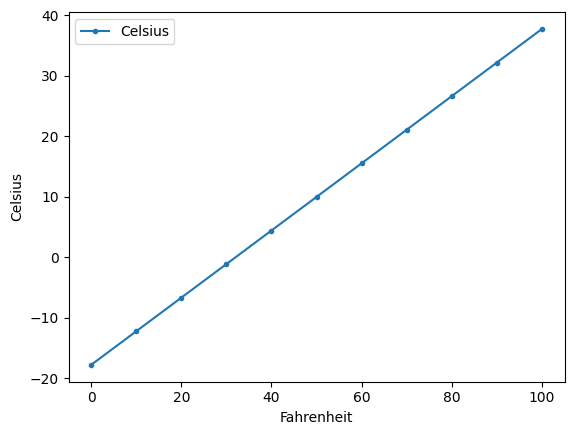

In [5]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Section 1 - Load: Follow the instructions to load NY City January high temperature from a csv file into a DataFrame

In [40]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2023.csv')


## Section 2 - View: Follow the instructions to view head and tail of the file. 

In [41]:
nyc.head()

,Date,Value,Anomaly
0,189501,26.69,-3.43
1,189601,31.48,1.36
2,189701,28.17,-1.95
3,189801,30.67,0.55
4,189901,29.68,-0.44


In [42]:
nyc.tail()

,Date,Value,Anomaly
124,201901,32.56,2.44
125,202001,35.55,5.43
126,202101,34.59,4.47
127,202201,31.17,1.05
128,202301,35.15,5.03


## Section 3 - Clean: Follow the instructions to clean the data.

In [43]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [44]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,26.69,-3.43
1,189601,31.48,1.36
2,189701,28.17,-1.95


In [45]:
nyc.Date.dtype

dtype('int64')

In [46]:
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,26.69,-3.43
1,1896,31.48,1.36
2,1897,28.17,-1.95


## Section 4 - Describe: Use describe() to calculate basic descriptive statistics for the dataset. 

In [47]:
pd.set_option('display.precision', 2)

In [48]:
nyc.Temperature.describe()

count    129.00
mean      30.59
std        3.08
min       21.90
25%       29.23
50%       30.88
75%       32.45
max       38.93
Name: Temperature, dtype: float64

## Section 5 - Calculate Line: Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

In [49]:
from scipy import stats

In [50]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [51]:
linear_regression.slope

0.02165949239713774

In [52]:
linear_regression.intercept

-11.843038629248646

## Section 6 - Predict: Use your results to predict the "average high temp in Jan" for the year 2026. 

In [53]:
linear_regression.slope * 2026 + linear_regression.intercept

32.03909296735241

## Section 7 - Plot: Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed.

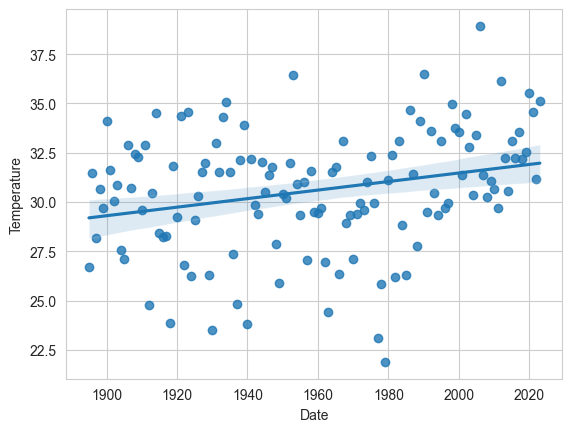

In [54]:
import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

# Part 2 - Machine Learning

### Loading the Average High Temperatures into a DataFrame

In [55]:
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2023.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,26.69,-3.43
1,1896,31.48,1.36
2,1897,28.17,-1.95


### Splitting the Data for Training and Testing

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

In [57]:
X_train.shape

(96, 1)

In [58]:
X_test.shape

(33, 1)

### Training the Model

In [60]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [61]:
linear_regression.coef_

array([0.01504135])

In [62]:
linear_regression.intercept_

1.1904819616309652

### Testing the Model

In [64]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 29.69, expected: 26.69
predicted: 30.67, expected: 29.46
predicted: 30.85, expected: 29.93
predicted: 31.35, expected: 33.39
predicted: 31.39, expected: 30.27
predicted: 31.26, expected: 33.78
predicted: 30.02, expected: 28.27


### Predicting Future Temperatures and Estimating Past Temperatures

In [66]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2026)

array([31.66424917])

### Visualizing the Dataset with the Regression Line

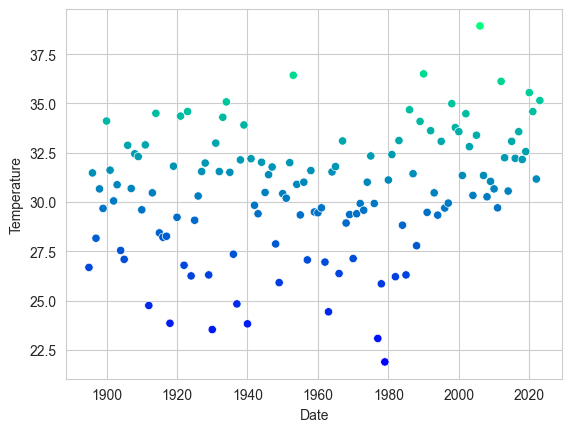

In [67]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False)

In [68]:
axes.set_ylim(10, 70)

(10.0, 70.0)

In [69]:
import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

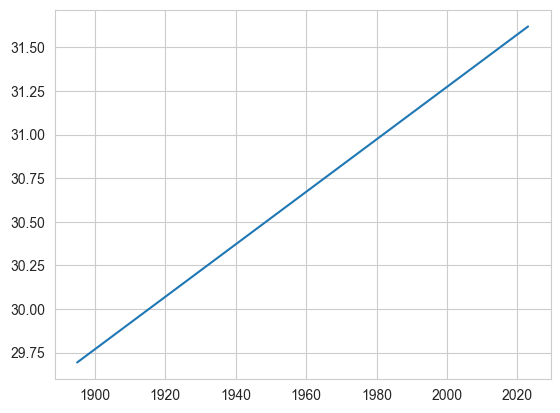

In [70]:
import matplotlib.pyplot as plt

line = plt.plot(x, y)

# Remarks

In summary, "scikit-learn linear regression" is a more general term that encompasses both simple and multiple linear regression tasks, as well as additional features and capabilities provided by the scikit-learn library. Simple linear regression, on the other hand, specifically refers to the case where there is only one independent variable. When working with simple linear regression within scikit-learn, you can use the same library but with a single independent variable. However, scikit-learn's linear regression can be extended to handle more complex scenarios with multiple independent variables and advanced techniques.